# Introduction
>The National Agency of Petroleum, Natural Gas and Bio fuels (ANP in Portuguese) releases weekly reports of gas, diesel and other fuels prices used in transportation across the country. These datasets bring the mean value per liter, number of gas stations analyzed and other information grouped by regions and states across the country.

>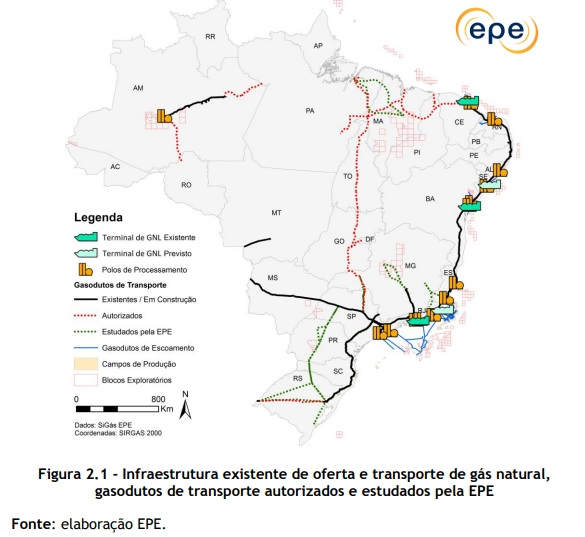

>For more information about dataset and problem : https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil

### **Featurs in Dataset**

Unnamed: 0 : Unique ID

DATA INICIAL : First day of analyses in the week

DATA FINAL : Last day of analyses in the week

REGIÃO : Macro region
ESTADO : State

PRODUTO : Kind of Product

NÚMERO DE POSTOS PESQUISADOS : Number of Gas Stations analyzed

UNIDADE DE MEDIDA : Measurement unit

PREÇO MÉDIO REVENDA : Mean Market Price

DESVIO PADRÃO REVENDA : Standard Deviation Price

PREÇO MÍNIMO REVENDA : Min Price observed

PREÇO MÁXIMO REVENDA : Max Price Observed

MARGEM MÉDIA REVENDA : Mean Price Margin

COEF DE VARIAÇÃO REVENDA : Coefficient of variation

PREÇO MÉDIO DISTRIBUIÇÃO : Mean Distribution Price

DESVIO PADRÃO DISTRIBUIÇÃO : Distribution standard deviation

PREÇO MÍNIMO DISTRIBUIÇÃO : Distribution Min Price

PREÇO MÁXIMO DISTRIBUIÇÃO : Distribution Max Price

COEF DE VARIAÇÃO DISTRIBUIÇÃO : Distribution's coefficient of variation

MÊS : Month

ANO : Year

# Imporing Libraries and Dataset



In [ ]:
!pip3 install pandas_profiling --upgrade    

In [ ]:
pip install datasist

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np
%matplotlib inline
sns.set(rc={'figure.figsize':(8, 8)}, font_scale=1.3)

In [ ]:
df = pd.read_csv('2004-2019.tsv',sep='\t')

In [ ]:
df.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [ ]:
df.tail()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
106818,106818,2019-06-23,2019-06-29,NORDESTE,RIO GRANDE DO NORTE,GNV,7,R$/m3,3.574,0.065,3.499,3.690,0.818,0.018,2.756,0,2.756,2.756,0,6,2019
106819,106819,2019-06-23,2019-06-29,SUL,RIO GRANDE DO SUL,GNV,23,R$/m3,3.401,0.129,3.230,3.789,0.95,0.038,2.451,0.402,1.9842,2.8661,0.164,6,2019
106820,106820,2019-06-23,2019-06-29,SUL,SANTA CATARINA,GNV,24,R$/m3,2.912,0.190,2.699,3.499,0.914,0.065,1.998,0,1.9981,1.9981,0,6,2019
106821,106821,2019-06-23,2019-06-29,SUDESTE,SAO PAULO,GNV,52,R$/m3,3.020,0.229,2.699,3.490,0.646,0.076,2.374,0.165,2.0179,2.5093,0.07,6,2019
106822,106822,2019-06-23,2019-06-29,NORDESTE,SERGIPE,GNV,4,R$/m3,3.697,0.005,3.689,3.699,1.179,0.001,2.518,0,2.5175,2.5175,0,6,2019


In [ ]:
df.sample(5)

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
65726,65726,2014-04-06,2014-04-12,CENTRO OESTE,DISTRITO FEDERAL,ÓLEO DIESEL S10,11,R$/l,2.767,0.015,2.74,2.790,-,0.005,-,-,-,-,-,4,2014
82815,82815,2016-06-05,2016-06-11,NORDESTE,RIO GRANDE DO NORTE,GASOLINA COMUM,60,R$/l,3.829,0.065,3.72,3.940,0.477,0.017,3.352,0.052,3.2185,3.419,0.016,6,2016
8217,8217,2010-04-04,2010-04-10,NORTE,AMAPA,ETANOL HIDRATADO,17,R$/l,2.313,0.061,2.17,2.400,-,0.026,-,-,-,-,-,4,2010
19951,19951,2010-01-10,2010-01-16,NORDESTE,ALAGOAS,GASOLINA COMUM,100,R$/l,2.735,0.054,2.55,2.800,0.46,0.020,2.275,0.049,2.1543,2.4025,0.022,1,2010
62955,62955,2013-12-01,2013-12-07,CENTRO OESTE,MATO GROSSO DO SUL,ÓLEO DIESEL,101,R$/l,2.639,0.088,2.44,2.769,0.405,0.033,2.234,0.063,2.099,2.385,0.028,12,2013


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
# Renaming Columns as it isn't written in english
df.rename(columns={
        "DATA INICIAL": "start_date",
        "DATA FINAL": "end_date",
        "REGIÃO": "region",
        "ESTADO": "state",
        "PRODUTO": "Product_Kind",
        "NÚMERO DE POSTOS PESQUISADOS": "n_gas_stations",
        "UNIDADE DE MEDIDA": "Measuring unit",
        "PREÇO MÉDIO REVENDA": "avg_price",
        "DESVIO PADRÃO REVENDA": "sd_price",
        "PREÇO MÍNIMO REVENDA": "min_price",
        "PREÇO MÁXIMO REVENDA": "max_price",
        "MARGEM MÉDIA REVENDA": "avg_price_margin",
        "ANO": "year",
        "MÊS": "month",
        "COEF DE VARIAÇÃO DISTRIBUIÇÃO": "coef_dist",
        "PREÇO MÁXIMO DISTRIBUIÇÃO": "dist_max_price",
        "PREÇO MÍNIMO DISTRIBUIÇÃO": "dist_min_price",
        "DESVIO PADRÃO DISTRIBUIÇÃO": "dist_sd_price",
        "PREÇO MÉDIO DISTRIBUIÇÃO": "dist_avg_price",
        "COEF DE VARIAÇÃO REVENDA": "coef_price"
    }, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   start_date        106823 non-null  object 
 1   end_date          106823 non-null  object 
 2   region            106823 non-null  object 
 3   state             106823 non-null  object 
 4   Product_Kind      106823 non-null  object 
 5   n_gas_stations    106823 non-null  int64  
 6   Measuring unit    106823 non-null  object 
 7   avg_price         106823 non-null  float64
 8   sd_price          106823 non-null  float64
 9   min_price         106823 non-null  float64
 10  max_price         106823 non-null  float64
 11  avg_price_margin  106823 non-null  object 
 12  coef_price        106823 non-null  float64
 13  dist_avg_price    106823 non-null  object 
 14  dist_sd_price     106823 non-null  object 
 15  dist_min_price    106823 non-null  object 
 16  dist_max_price    10

In [ ]:
df.describe()

,n_gas_stations,avg_price,sd_price,min_price,max_price,coef_price,month,year
count,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000
mean,233.770976,10.870780,0.657227,9.416038,12.537731,0.045418,6.484006,2011.802271
std,403.282519,17.752533,1.349169,15.092193,20.841497,0.025066,3.443391,4.391530
min,1.000000,0.766000,0.000000,0.590000,0.999000,0.000000,1.000000,2004.000000
25%,42.000000,2.072000,0.072000,1.900000,2.310000,0.029000,4.000000,2008.000000
50%,104.000000,2.718000,0.114000,2.510000,2.999000,0.041000,6.000000,2012.000000
75%,243.000000,3.752000,0.191000,3.499000,4.150000,0.058000,9.000000,2016.000000
max,4167.000000,99.357000,10.748000,90.000000,120.000000,0.395000,12.000000,2019.000000


In [ ]:
df['start_date'] = pd.to_datetime(df['start_date'])

In [ ]:
df['end_date'] = pd.to_datetime(df['end_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   start_date        106823 non-null  datetime64[ns]
 1   end_date          106823 non-null  datetime64[ns]
 2   region            106823 non-null  object        
 3   state             106823 non-null  object        
 4   Product_Kind      106823 non-null  object        
 5   n_gas_stations    106823 non-null  int64         
 6   Measuring unit    106823 non-null  object        
 7   avg_price         106823 non-null  float64       
 8   sd_price          106823 non-null  float64       
 9   min_price         106823 non-null  float64       
 10  max_price         106823 non-null  float64       
 11  avg_price_margin  106823 non-null  object        
 12  coef_price        106823 non-null  float64       
 13  dist_avg_price    106823 non-null  object        
 14  dist

In [ ]:
# Translate some values to english
regions = {"SUL":"SOUTH", "SUDESTE":"SOUTHEAST", "CENTRO OESTE":"MIDWEST", 
            "NORTE":"NORTH", "NORDESTE":"NORTHEAST"}
df["region"] = df['region'].map(regions)

In [ ]:
# Translate some values to english
Product_Kind = {"ÓLEO DIESEL":"DIESEL", "GASOLINA COMUM":"REGULAR GASOLINE", "GLP":"LPG", 
            "ETANOL HIDRATADO":"HYDROUS ETHANOL", "GNV":"NATURAL GAS", "ÓLEO DIESEL S10":"DIESEL S10"}
df["Product_Kind"] = df['Product_Kind'].map(Product_Kind)

In [ ]:
df

,start_date,end_date,region,state,Product_Kind,n_gas_stations,Measuring unit,avg_price,sd_price,min_price,max_price,avg_price_margin,coef_price,dist_avg_price,dist_sd_price,dist_min_price,dist_max_price,coef_dist,month,year
0,2004-05-09,2004-05-15,MIDWEST,DISTRITO FEDERAL,HYDROUS ETHANOL,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,MIDWEST,GOIAS,HYDROUS ETHANOL,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,MIDWEST,MATO GROSSO,HYDROUS ETHANOL,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,MIDWEST,MATO GROSSO DO SUL,HYDROUS ETHANOL,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORTHEAST,ALAGOAS,HYDROUS ETHANOL,103,R$/l,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106818,2019-06-23,2019-06-29,NORTHEAST,RIO GRANDE DO NORTE,NATURAL GAS,7,R$/m3,3.574,0.065,3.499,3.690,0.818,0.018,2.756,0,2.756,2.756,0,6,2019
106819,2019-06-23,2019-06-29,SOUTH,RIO GRANDE DO SUL,NATURAL GAS,23,R$/m3,3.401,0.129,3.230,3.789,0.95,0.038,2.451,0.402,1.9842,2.8661,0.164,6,2019
106820,2019-06-23,2019-06-29,SOUTH,SANTA CATARINA,NATURAL GAS,24,R$/m3,2.912,0.190,2.699,3.499,0.914,0.065,1.998,0,1.9981,1.9981,0,6,2019
106821,2019-06-23,2019-06-29,SOUTHEAST,SAO PAULO,NATURAL GAS,52,R$/m3,3.020,0.229,2.699,3.490,0.646,0.076,2.374,0.165,2.0179,2.5093,0.07,6,2019


# Analysis and Visualization

In [ ]:
# Checking null values
df.isnull().sum()

start_date          0
end_date            0
region              0
state               0
Product_Kind        0
n_gas_stations      0
Measuring unit      0
avg_price           0
sd_price            0
min_price           0
max_price           0
avg_price_margin    0
coef_price          0
dist_avg_price      0
dist_sd_price       0
dist_min_price      0
dist_max_price      0
coef_dist           0
month               0
year                0
dtype: int64

## Productive Regions

In [ ]:
df['region'].value_counts()

NORTHEAST    36869
NORTH        24702
SOUTHEAST    17047
MIDWEST      15429
SOUTH        12776
Name: region, dtype: int64

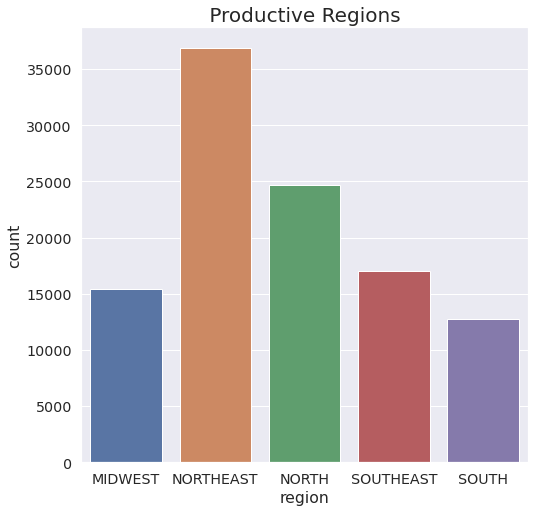

In [ ]:
sns.countplot(x = df['region'])
plt.title(" Productive Regions ", size=20 )
plt.show()

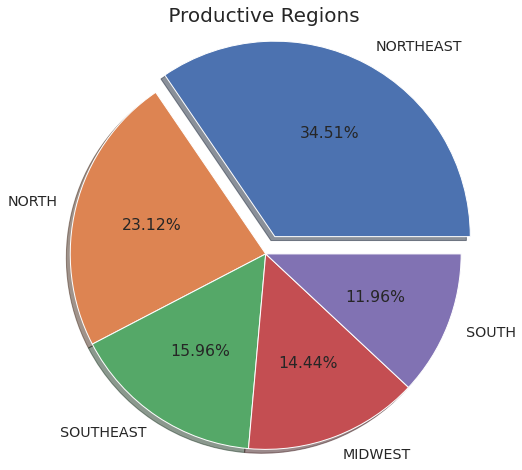

In [ ]:
plt.pie(df['region'].value_counts(),labels=df['region'].value_counts().index,
        autopct ='%1.2f%%',shadow = True, explode = [0.1,0,0,0,0])
plt.title(" Productive Regions  ", size=20 )
plt.axis('equal')
plt.show()

## Productive States

In [ ]:
df['state'].value_counts()

RIO DE JANEIRO         4263
SAO PAULO              4263
RIO GRANDE DO SUL      4263
BAHIA                  4263
CEARA                  4263
PARAIBA                4263
SANTA CATARINA         4262
RIO GRANDE DO NORTE    4262
PERNAMBUCO             4262
MINAS GERAIS           4261
ESPIRITO SANTO         4260
SERGIPE                4259
PARANA                 4251
ALAGOAS                4250
MATO GROSSO DO SUL     4246
MATO GROSSO            4037
AMAZONAS               3889
GOIAS                  3663
PIAUI                  3548
MARANHAO               3499
PARA                   3497
DISTRITO FEDERAL       3483
TOCANTINS              3483
ACRE                   3480
RONDONIA               3479
RORAIMA                3471
AMAPA                  3403
Name: state, dtype: int64

**as we see states production is close to each other**

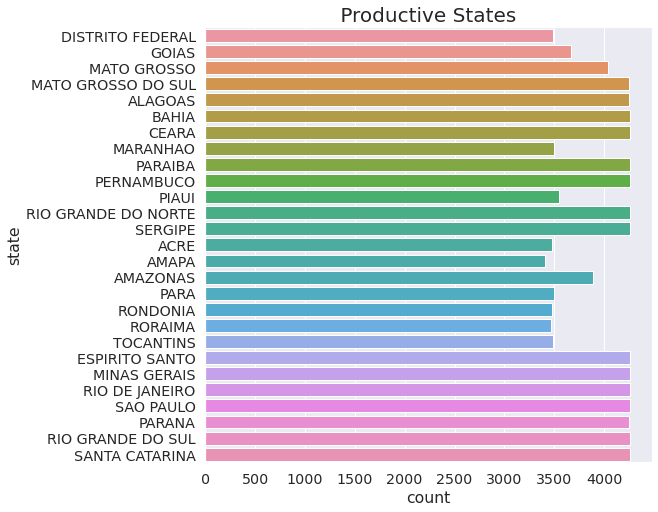

In [ ]:
sns.countplot(y = df['state'])
plt.title(" Productive States ", size=20 )
plt.show()

## Products Count

In [ ]:
df['Product_Kind'].value_counts()

REGULAR GASOLINE    21194
DIESEL              21194
LPG                 21186
HYDROUS ETHANOL     21102
NATURAL GAS         13034
DIESEL S10           9113
Name: Product_Kind, dtype: int64

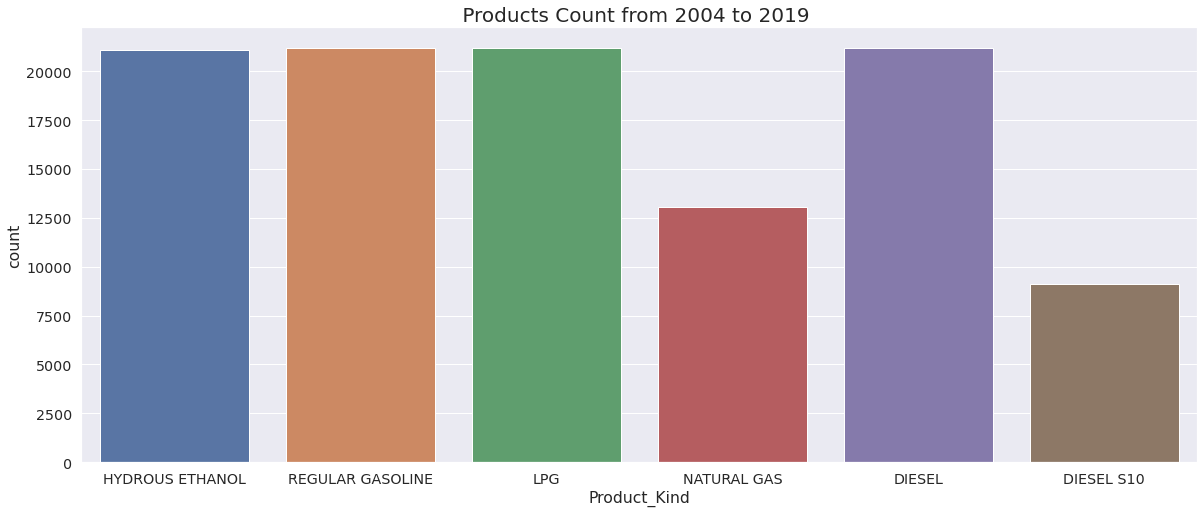

In [ ]:
sns.set(rc={'figure.figsize':(20, 8)}, font_scale=1.3)
sns.countplot(x = df['Product_Kind'])
plt.title(" Products Count from 2004 to 2019  ", size=20 )
plt.show()

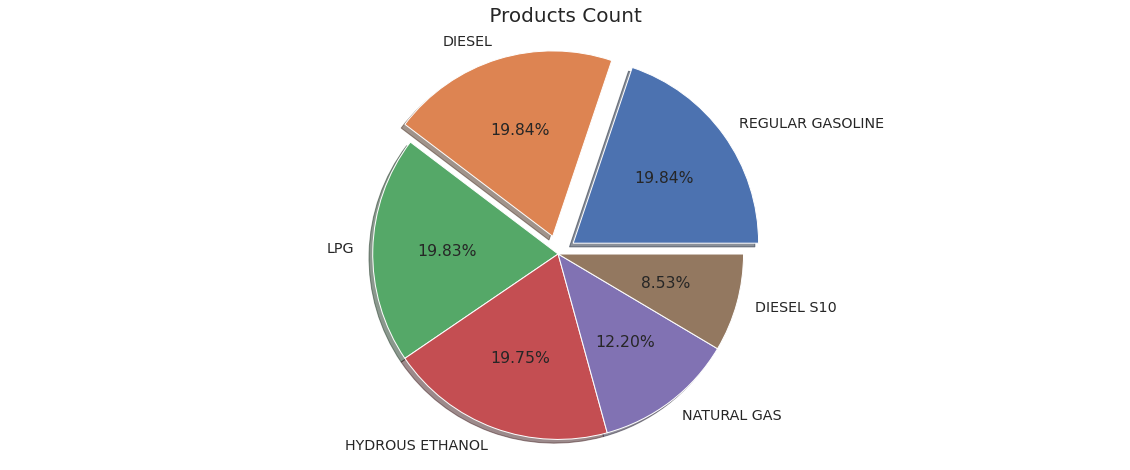

In [ ]:
plt.pie(df['Product_Kind'].value_counts(),labels=df['Product_Kind'].value_counts().index,
        autopct ='%1.2f%%',shadow = True,explode = [0.1,0.1,0,0,0,0])
plt.title(" Products Count ", size=20 )
plt.axis('equal')
plt.show()

## Years Production 

In [ ]:
df['year'].value_counts()

2017    7990
2014    7932
2013    7921
2016    7873
2018    7823
2015    7771
2012    6634
2006    6598
2010    6489
2011    6487
2007    6475
2008    6453
2009    6232
2005    6186
2004    4205
2019    3754
Name: year, dtype: int64

**as we see years production is close to each othe except 2004 and 2019**

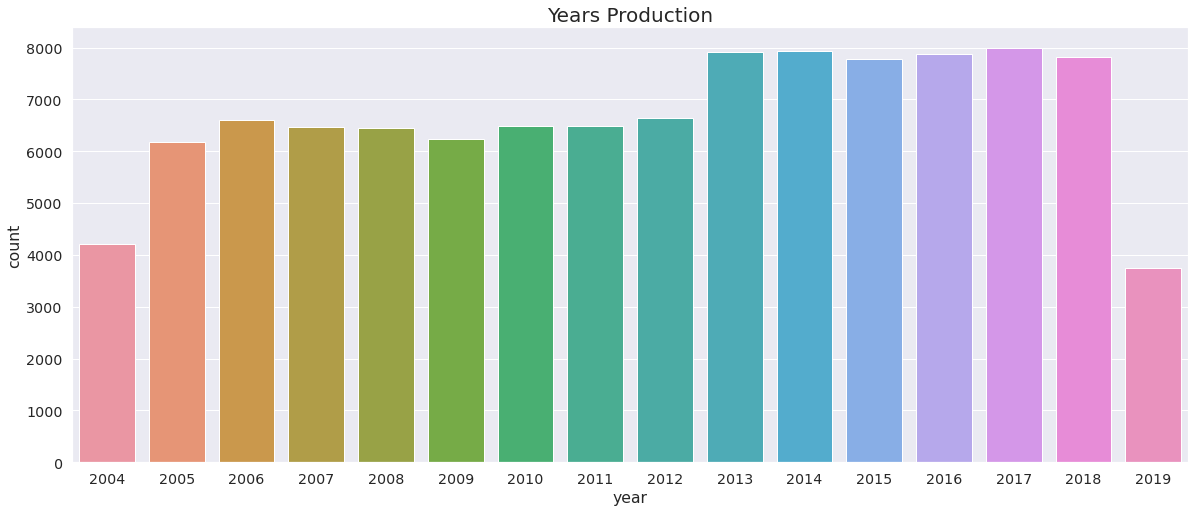

In [ ]:
sns.countplot(x=df['year'])
plt.title("Years Production", size=20)
plt.show()

## Measuring Uint Count

In [ ]:
df['Measuring unit'].value_counts()

R$/l       72603
R$/13Kg    21186
R$/m3      13034
Name: Measuring unit, dtype: int64

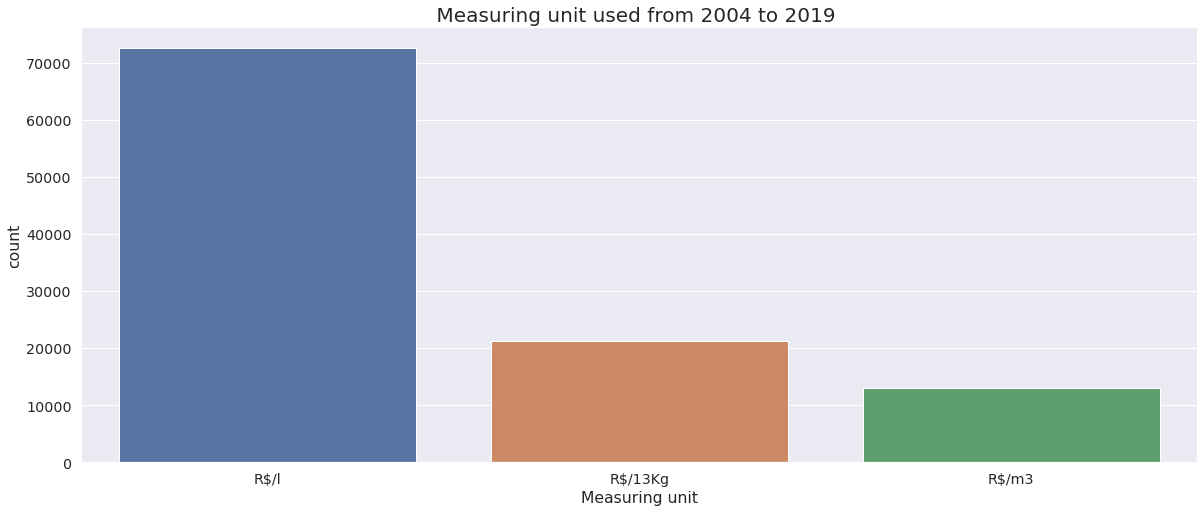

In [ ]:
sns.countplot(x = df['Measuring unit'])
plt.title(" Measuring unit used from 2004 to 2019  ", size=20 )
plt.show()

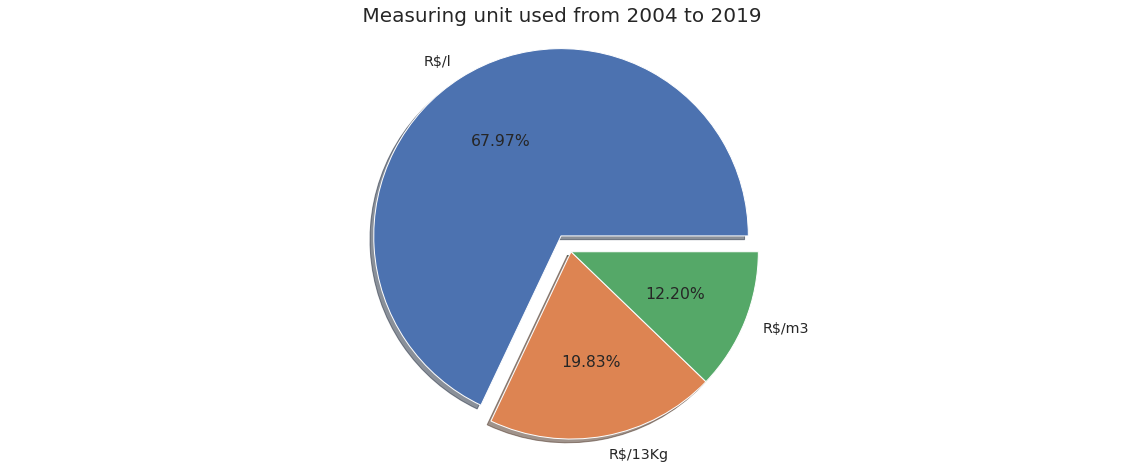

In [ ]:
plt.pie(df['Measuring unit'].value_counts(),labels=df['Measuring unit'].value_counts().index,
        autopct ='%1.2f%%',shadow = True,explode = [0.1,0,0])
plt.title(" Measuring unit used from 2004 to 2019  ", size=20 )
plt.axis('equal')
plt.show()

## Frequent Product in each State

In [ ]:
most_product_in_each_state = df.groupby('state').agg(lambda x:x.value_counts().index[0])['Product_Kind']
pd.DataFrame(most_product_in_each_state)

,Product_Kind
state,
ACRE,REGULAR GASOLINE
ALAGOAS,HYDROUS ETHANOL
AMAPA,REGULAR GASOLINE
AMAZONAS,HYDROUS ETHANOL
BAHIA,HYDROUS ETHANOL
CEARA,HYDROUS ETHANOL
DISTRITO FEDERAL,HYDROUS ETHANOL
ESPIRITO SANTO,HYDROUS ETHANOL
GOIAS,HYDROUS ETHANOL


In [ ]:
states = most_product_in_each_state.index
product_type = most_product_in_each_state.values

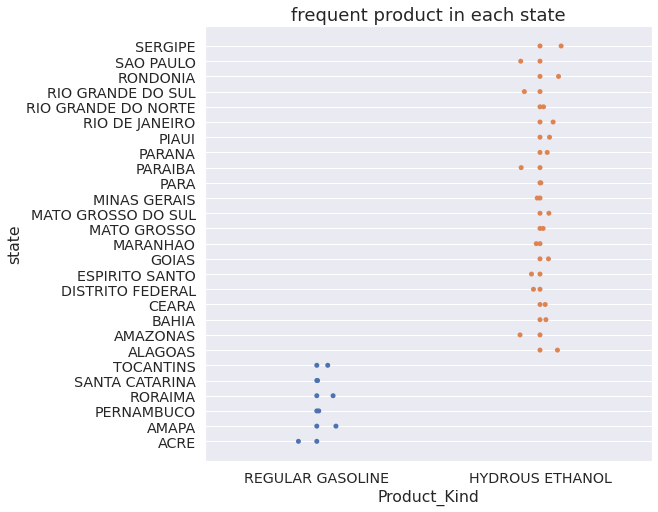

In [ ]:
sns.set(rc={'figure.figsize':(8, 8)}, font_scale=1.3)
sns.swarmplot(x=most_product_in_each_state,y= states)
sns.stripplot(x=most_product_in_each_state,y= states)
plt.title("frequent product in each state", size=18)
plt.show()

## Gas Stations vs Products
> Average of no of Gas Stations for each product

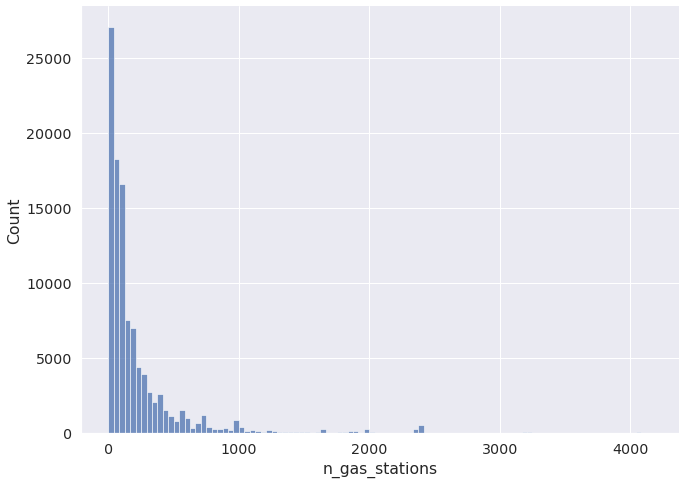

In [ ]:
sns.displot(df['n_gas_stations'],height = 7,aspect =1.4,bins=100)

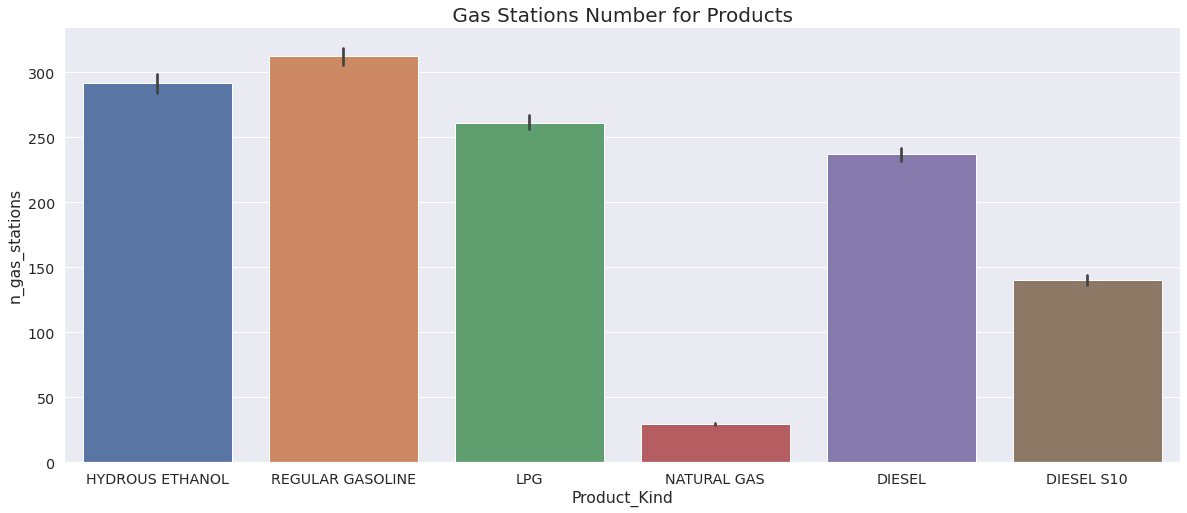

In [ ]:
sns.set(rc={'figure.figsize':(20, 8)}, font_scale=1.3)
plt.title(" Gas Stations Number for Products ", size=20 )
sns.barplot(y= df['n_gas_stations'],x=df['Product_Kind'])

## Frequent Product in each Year

In [ ]:
most_product_in_each_year = df.groupby('year').agg(lambda x:x.value_counts().index[0])['Product_Kind']
pd.DataFrame(most_product_in_each_year).T

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Product_Kind,HYDROUS ETHANOL,REGULAR GASOLINE,HYDROUS ETHANOL,HYDROUS ETHANOL,HYDROUS ETHANOL,HYDROUS ETHANOL,HYDROUS ETHANOL,HYDROUS ETHANOL,HYDROUS ETHANOL,HYDROUS ETHANOL,DIESEL,DIESEL,DIESEL,DIESEL,DIESEL,DIESEL


In [ ]:
years = most_product_in_each_year.index
product_type = most_product_in_each_year.values

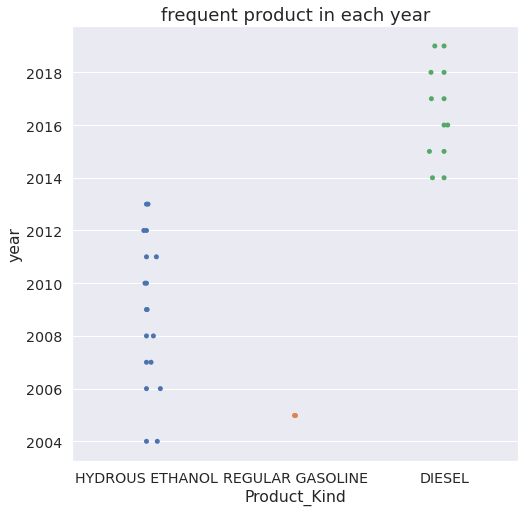

In [ ]:
sns.set(rc={'figure.figsize':(8, 8)}, font_scale=1.3)
sns.swarmplot(x=most_product_in_each_year,y= years)
sns.stripplot(x=most_product_in_each_year,y= years)
plt.title("frequent product in each year", size=18)
plt.show()

<BarContainer object of 16 artists>

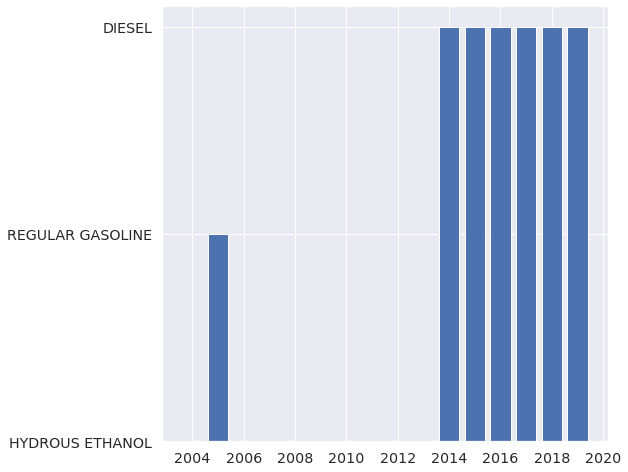

In [ ]:
plt.bar(years,most_product_in_each_year)

## Analysis Days for each product
> needed days for analysis for each product from 2004 to 2019

In [ ]:
from datetime import datetime, timedelta
df['Analysis_Days']=(df['end_date'] - df['start_date']) / timedelta(days=1)

In [ ]:
df['Analysis_Days'].value_counts()

6.0    106823
Name: Analysis_Days, dtype: int64

**as we see analysis days need for any product is 6 days**

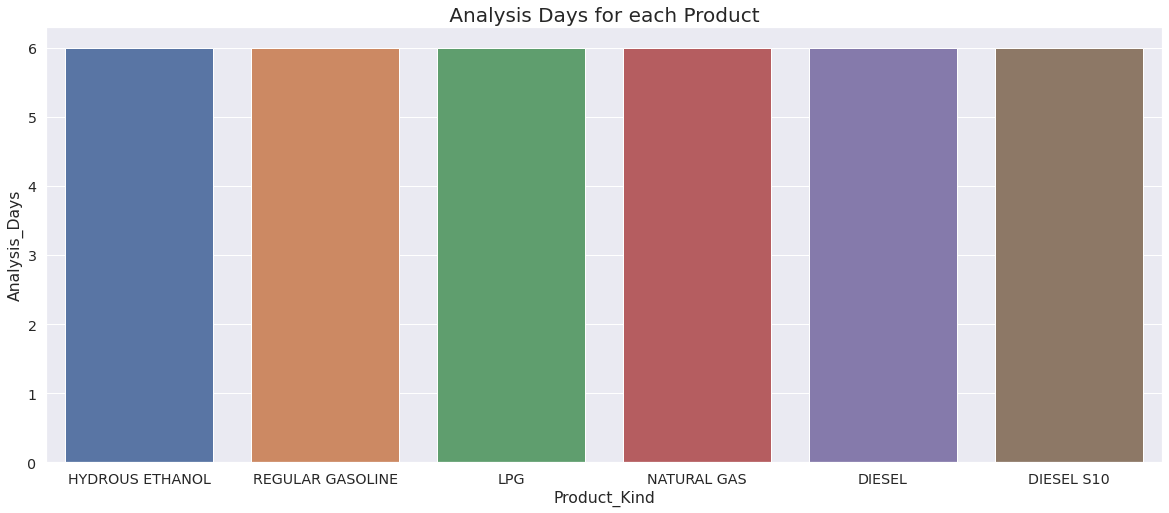

In [ ]:
sns.set(rc={'figure.figsize':(20, 8)}, font_scale=1.3)
plt.title(" Analysis Days for each Product ", size=20 )
sns.barplot(y= df['Analysis_Days'],x=df['Product_Kind'])

## Average Industrialization Price for year
> for average of Average Industrialization Price for each year from 2004 to 2019

In [ ]:
df.groupby('year').mean()['avg_price']

year
2004     8.351370
2005     8.362085
2006     8.917147
2007     9.027187
2008     9.167603
2009     9.559809
2010    10.042510
2011    10.248218
2012    10.443419
2013     9.516663
2014    10.088056
2015    11.339927
2016    12.717348
2017    13.761745
2018    15.786378
2019    16.077599
Name: avg_price, dtype: float64

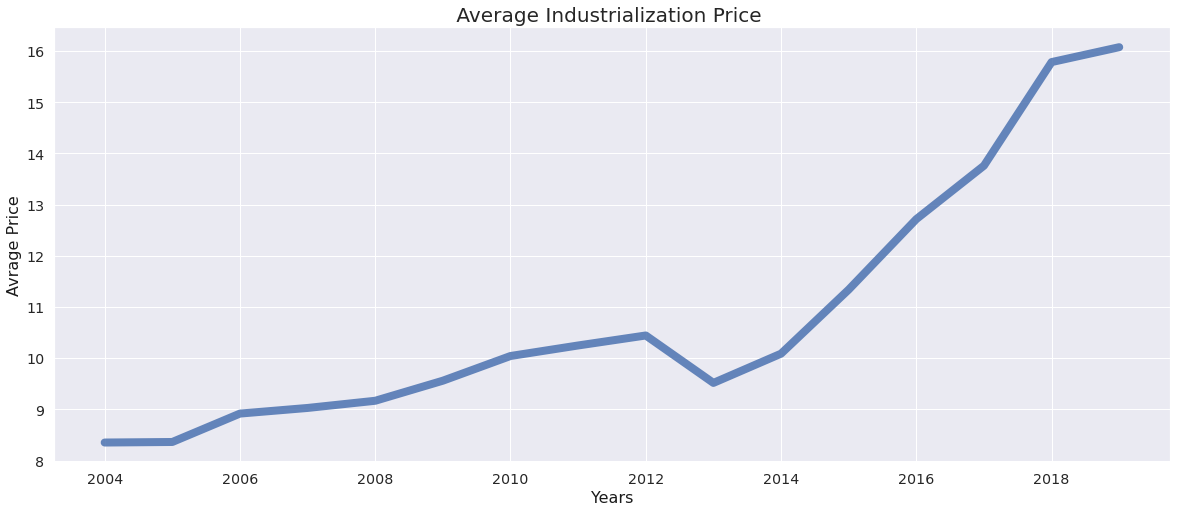

In [ ]:
plt.plot(df.groupby('year').mean()['avg_price'],color = 'b',ls = '-',lw = 8, alpha = 0.85)           
plt.title(" Average Industrialization Price  ", size=20 )
# Add  X-axis Label 
plt.xlabel('Years',color = 'k',size=16)
# Add Y-axis Label
plt.ylabel('Avrage Price',color = 'k',size=16)
plt.show()

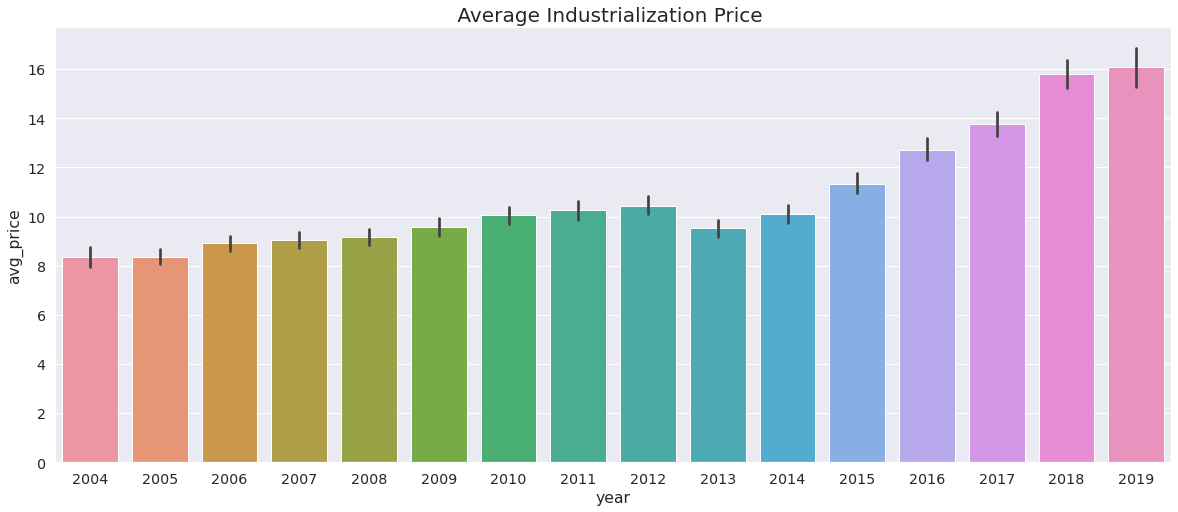

In [ ]:
plt.title(" Average Industrialization Price  ", size=20 )
sns.barplot(y= df['avg_price'],x=df['year'])

## Maximium Industrialization Price for years
> for average of Max Industrialization Price for each year from 2004 to 2019

In [ ]:
df.groupby('year').mean()['max_price']

year
2004     9.498840
2005     9.589810
2006    10.059327
2007    10.242816
2008    10.433996
2009    10.858649
2010    11.352890
2011    11.647174
2012    11.973097
2013    10.936433
2014    11.630325
2015    13.084597
2016    14.832729
2017    16.262823
2018    18.564730
2019    18.964909
Name: max_price, dtype: float64

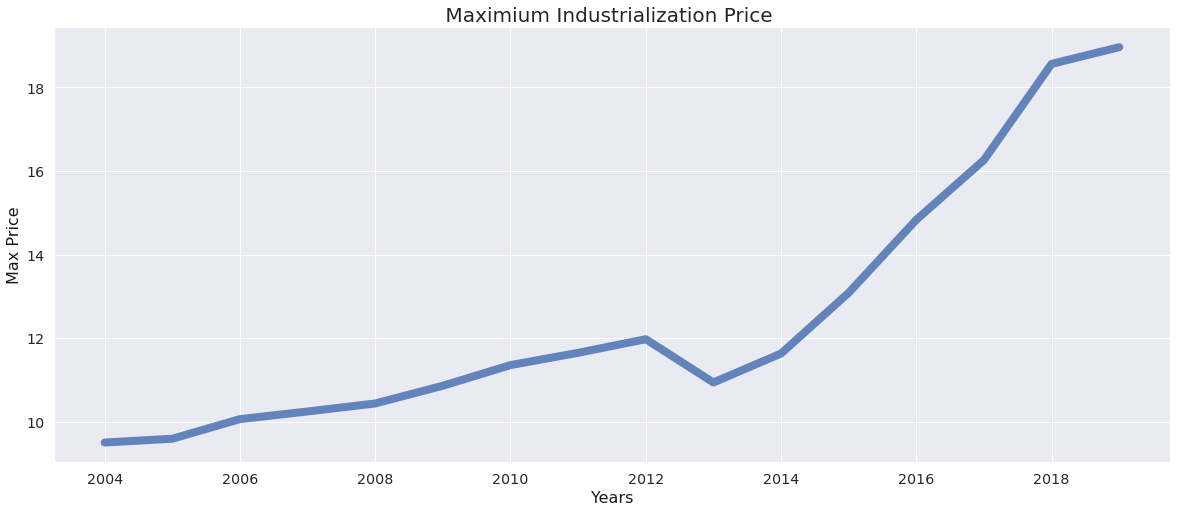

In [ ]:
plt.plot(df.groupby('year').mean()['max_price'],color = 'b',ls = '-',lw = 8, alpha = 0.85)           
plt.title(" Maximium Industrialization Price  ", size=20 )
# Add  X-axis Label 
plt.xlabel('Years',color = 'k',size=16)
# Add Y-axis Label
plt.ylabel('Max Price',color = 'k',size=16)
plt.show()

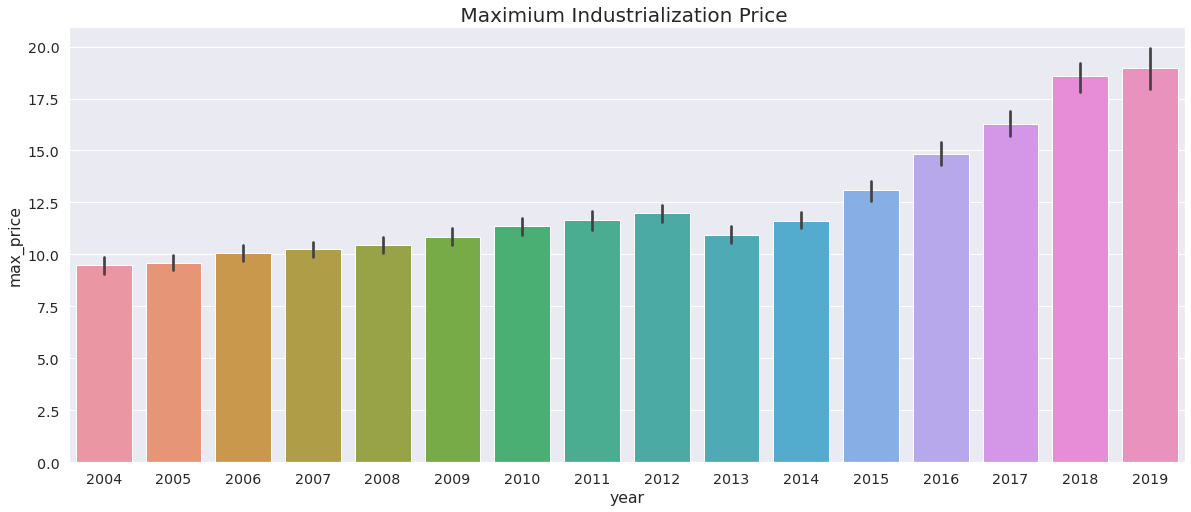

In [ ]:
plt.title(" Maximium Industrialization Price  ", size=20 )
sns.barplot(y= df['max_price'],x=df['year'])

## Minimum Industrialization Price for years
> for average of Min Industrialization Price for each year from 2004 to 2019

In [ ]:
df.groupby('year').mean()['min_price']

year
2004     7.289826
2005     7.427666
2006     7.985186
2007     8.014944
2008     8.096342
2009     8.459078
2010     8.736457
2011     8.938774
2012     9.074207
2013     8.162964
2014     8.566297
2015     9.579829
2016    10.726421
2017    11.732901
2018    13.684626
2019    13.992034
Name: min_price, dtype: float64

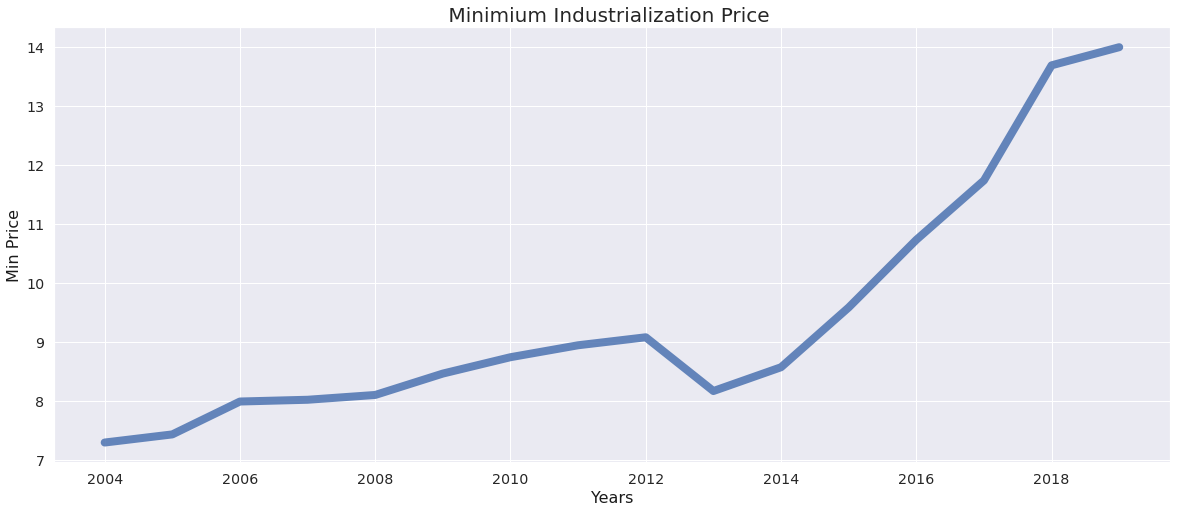

In [ ]:
plt.plot(df.groupby('year').mean()['min_price'],color = 'b',ls = '-',lw = 8, alpha = 0.85)           
plt.title(" Minimium Industrialization Price  ", size=20 )
# Add  X-axis Label 
plt.xlabel('Years',color = 'k',size=16)
# Add Y-axis Label
plt.ylabel('Min Price',color = 'k',size=16)
plt.show()

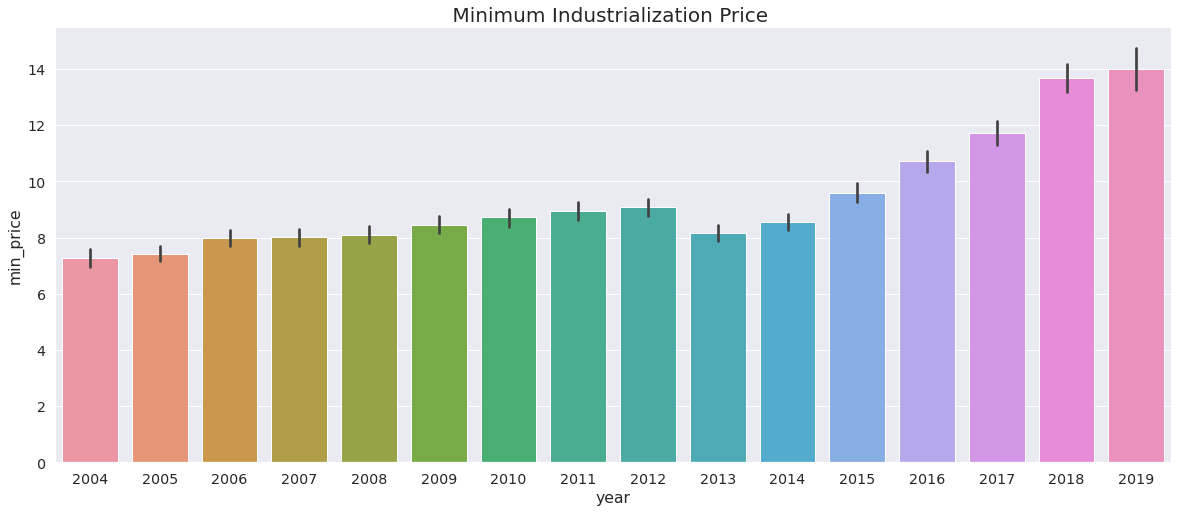

In [ ]:
plt.title(" Minimum Industrialization Price  ", size=20 )
sns.barplot(y= df['min_price'],x=df['year'])

**as we see from last 3 previous charts the max,min and average price of manfuctering 're close to each other in each year from 2004 to 2019**

## Average Industrialization Price for products
> for average of Average Industrialization Price for each product from 2004 to 2019

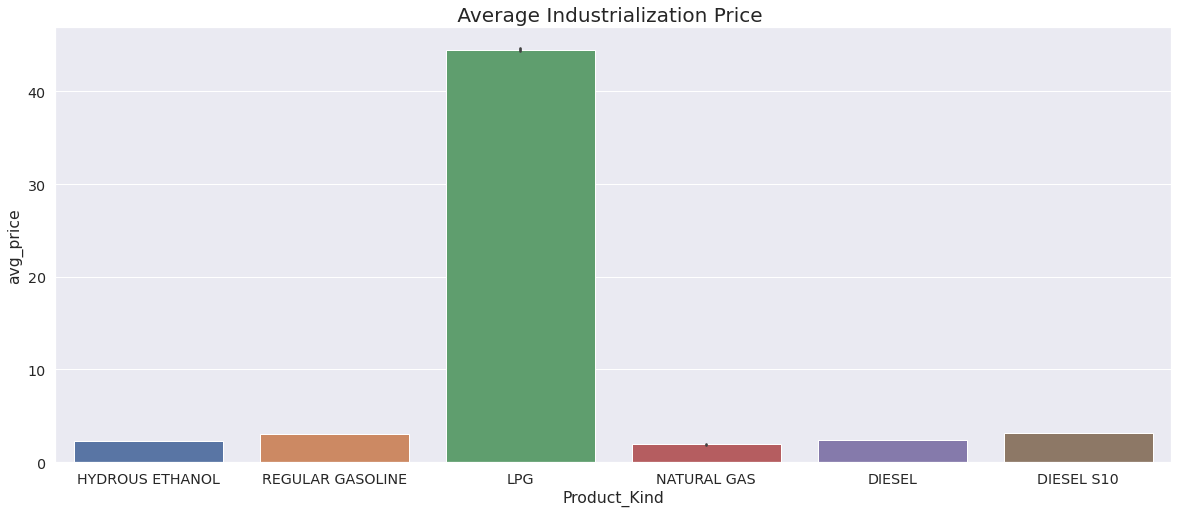

In [ ]:
plt.title(" Average Industrialization Price  ", size=20 )
sns.barplot(y= df['avg_price'],x=df['Product_Kind'])

## Maximium Industrialization Price for products
> for average of Max Industrialization Price for each product from 2004 to 2019

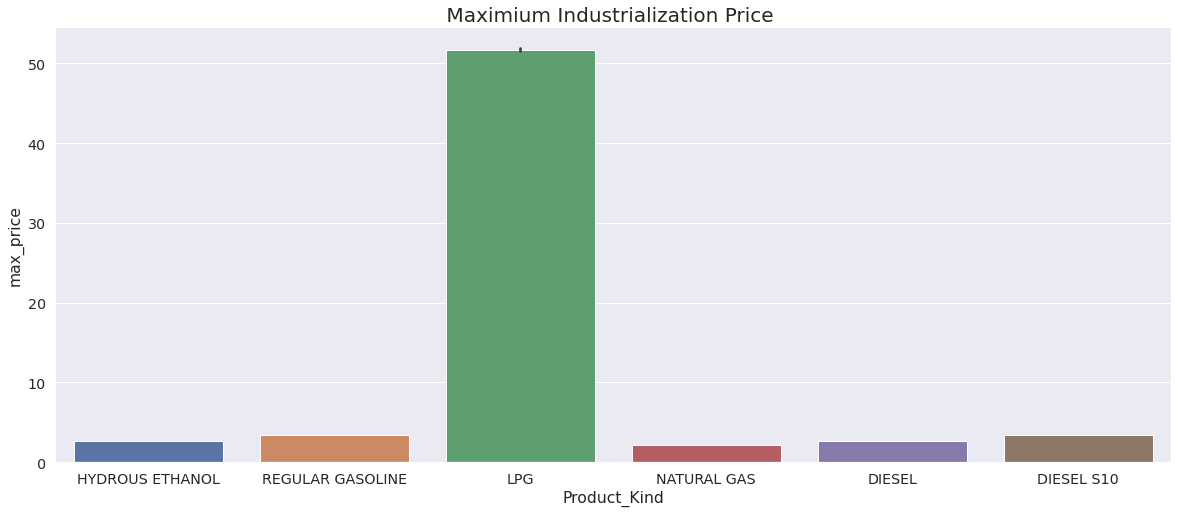

In [ ]:
plt.title(" Maximium Industrialization Price  ", size=20 )
sns.barplot(y= df['max_price'],x=df['Product_Kind'])

## Minimum Industrialization Price for products
> for average of Min Industrialization Price for each product from 2004 to 2019

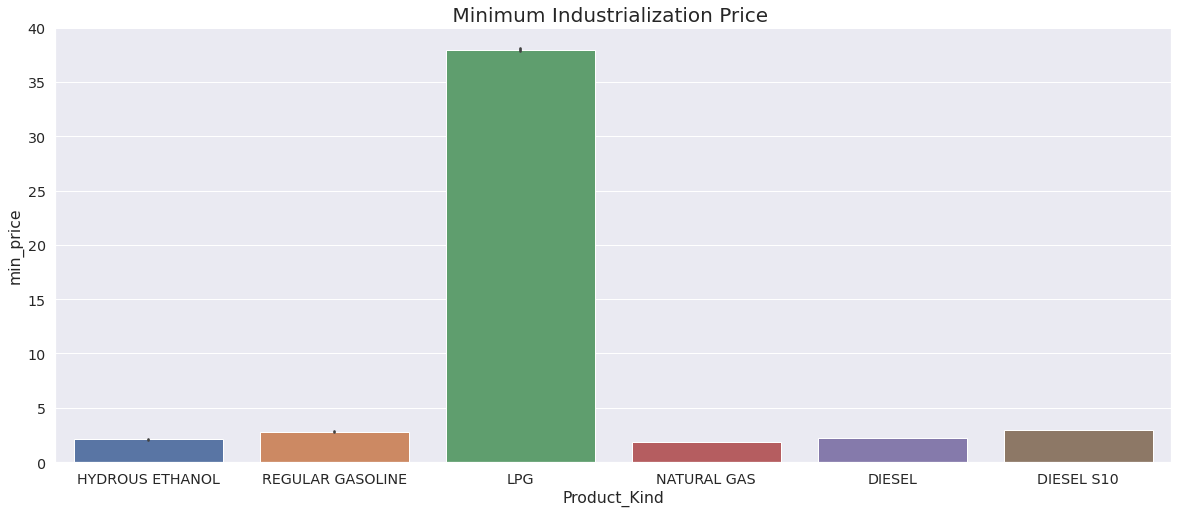

In [ ]:
plt.title(" Minimum Industrialization Price  ", size=20 )
sns.barplot(y= df['min_price'],x=df['Product_Kind'])

# Data Preprocessing

## Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   start_date        106823 non-null  datetime64[ns]
 1   end_date          106823 non-null  datetime64[ns]
 2   region            106823 non-null  object        
 3   state             106823 non-null  object        
 4   Product_Kind      106823 non-null  object        
 5   n_gas_stations    106823 non-null  int64         
 6   Measuring unit    106823 non-null  object        
 7   avg_price         106823 non-null  float64       
 8   sd_price          106823 non-null  float64       
 9   min_price         106823 non-null  float64       
 10  max_price         106823 non-null  float64       
 11  avg_price_margin  106823 non-null  object        
 12  coef_price        106823 non-null  float64       
 13  dist_avg_price    106823 non-null  object        
 14  dist

**There are numerical columns hold datatype of object**

In [ ]:
columns= ['avg_price_margin', 'dist_avg_price' ,'dist_sd_price','dist_min_price','dist_max_price' ,'coef_dist' ]
for col in columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   start_date        106823 non-null  datetime64[ns]
 1   end_date          106823 non-null  datetime64[ns]
 2   region            106823 non-null  object        
 3   state             106823 non-null  object        
 4   Product_Kind      106823 non-null  object        
 5   n_gas_stations    106823 non-null  int64         
 6   Measuring unit    106823 non-null  object        
 7   avg_price         106823 non-null  float64       
 8   sd_price          106823 non-null  float64       
 9   min_price         106823 non-null  float64       
 10  max_price         106823 non-null  float64       
 11  avg_price_margin  103392 non-null  float64       
 12  coef_price        106823 non-null  float64       
 13  dist_avg_price    103423 non-null  float64       
 14  dist

## Handling Missing Values

In [ ]:
df.isnull().sum()

start_date             0
end_date               0
region                 0
state                  0
Product_Kind           0
n_gas_stations         0
Measuring unit         0
avg_price              0
sd_price               0
min_price              0
max_price              0
avg_price_margin    3431
coef_price             0
dist_avg_price      3400
dist_sd_price       3400
dist_min_price      3400
dist_max_price      3400
coef_dist           3400
month                  0
year                   0
Analysis_Days          0
dtype: int64

In [ ]:
#Return percentage of missing values in each column  
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}  -  {}%'.format(col, round(pct_missing*100)))

start_date  -  0%
end_date  -  0%
region  -  0%
state  -  0%
Product_Kind  -  0%
n_gas_stations  -  0%
Measuring unit  -  0%
avg_price  -  0%
sd_price  -  0%
min_price  -  0%
max_price  -  0%
avg_price_margin  -  3%
coef_price  -  0%
dist_avg_price  -  3%
dist_sd_price  -  3%
dist_min_price  -  3%
dist_max_price  -  3%
coef_dist  -  3%
month  -  0%
year  -  0%
Analysis_Days  -  0%


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103392 entries, 0 to 106822
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   start_date        103392 non-null  datetime64[ns]
 1   end_date          103392 non-null  datetime64[ns]
 2   region            103392 non-null  object        
 3   state             103392 non-null  object        
 4   Product_Kind      103392 non-null  object        
 5   n_gas_stations    103392 non-null  int64         
 6   Measuring unit    103392 non-null  object        
 7   avg_price         103392 non-null  float64       
 8   sd_price          103392 non-null  float64       
 9   min_price         103392 non-null  float64       
 10  max_price         103392 non-null  float64       
 11  avg_price_margin  103392 non-null  float64       
 12  coef_price        103392 non-null  float64       
 13  dist_avg_price    103392 non-null  float64       
 14  dist

## Handling Categorical Data

In [ ]:
df = pd.get_dummies(df, columns=['Product_Kind','state','region'], drop_first=True)

In [ ]:
Unit_dict = {'R$/l':0, 'R$/13Kg':1, 'R$/m3':2}
df['Measuring unit'] = df['Measuring unit'].map(Unit_dict)
df

,start_date,end_date,n_gas_stations,Measuring unit,avg_price,sd_price,min_price,max_price,avg_price_margin,coef_price,dist_avg_price,dist_sd_price,dist_min_price,dist_max_price,coef_dist,month,year,Analysis_Days,Product_Kind_DIESEL S10,Product_Kind_HYDROUS ETHANOL,Product_Kind_LPG,Product_Kind_NATURAL GAS,Product_Kind_REGULAR GASOLINE,state_ALAGOAS,state_AMAPA,state_AMAZONAS,state_BAHIA,state_CEARA,state_DISTRITO FEDERAL,state_ESPIRITO SANTO,state_GOIAS,state_MARANHAO,state_MATO GROSSO,state_MATO GROSSO DO SUL,state_MINAS GERAIS,state_PARA,state_PARAIBA,state_PARANA,state_PERNAMBUCO,state_PIAUI,state_RIO DE JANEIRO,state_RIO GRANDE DO NORTE,state_RIO GRANDE DO SUL,state_RONDONIA,state_RORAIMA,state_SANTA CATARINA,state_SAO PAULO,state_SERGIPE,state_TOCANTINS,region_NORTH,region_NORTHEAST,region_SOUTH,region_SOUTHEAST
0,2004-05-09,2004-05-15,127,0,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004,6.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2004-05-09,2004-05-15,387,0,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004,6.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2004-05-09,2004-05-15,192,0,1.389,0.097,1.180,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004,6.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2004-05-09,2004-05-15,162,0,1.262,0.070,1.090,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004,6.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2004-05-09,2004-05-15,103,0,1.181,0.078,1.050,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004,6.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106818,2019-06-23,2019-06-29,7,2,3.574,0.065,3.499,3.690,0.818,0.018,2.756,0.000,2.7560,2.75600,0.000,6,2019,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
106819,2019-06-23,2019-06-29,23,2,3.401,0.129,3.230,3.789,0.950,0.038,2.451,0.402,1.9842,2.86610,0.164,6,2019,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
106820,2019-06-23,2019-06-29,24,2,2.912,0.190,2.699,3.499,0.914,0.065,1.998,0.000,1.9981,1.99810,0.000,6,2019,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
106821,2019-06-23,2019-06-29,52,2,3.020,0.229,2.699,3.490,0.646,0.076,2.374,0.165,2.0179,2.50930,0.070,6,2019,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
df.drop(['start_date'	,'end_date','Analysis_Days'],axis=1, inplace =True)

## Spliting

In [ ]:
x = df.drop(['avg_price'],axis=1)

In [ ]:
x

,n_gas_stations,Measuring unit,sd_price,min_price,max_price,avg_price_margin,coef_price,dist_avg_price,dist_sd_price,dist_min_price,dist_max_price,coef_dist,month,year,Product_Kind_DIESEL S10,Product_Kind_HYDROUS ETHANOL,Product_Kind_LPG,Product_Kind_NATURAL GAS,Product_Kind_REGULAR GASOLINE,state_ALAGOAS,state_AMAPA,state_AMAZONAS,state_BAHIA,state_CEARA,state_DISTRITO FEDERAL,state_ESPIRITO SANTO,state_GOIAS,state_MARANHAO,state_MATO GROSSO,state_MATO GROSSO DO SUL,state_MINAS GERAIS,state_PARA,state_PARAIBA,state_PARANA,state_PERNAMBUCO,state_PIAUI,state_RIO DE JANEIRO,state_RIO GRANDE DO NORTE,state_RIO GRANDE DO SUL,state_RONDONIA,state_RORAIMA,state_SANTA CATARINA,state_SAO PAULO,state_SERGIPE,state_TOCANTINS,region_NORTH,region_NORTHEAST,region_SOUTH,region_SOUTHEAST
0,127,0,0.016,1.190,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133,5,2004,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,387,0,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115,5,2004,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,192,0,0.097,1.180,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098,5,2004,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,162,0,0.070,1.090,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143,5,2004,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,103,0,0.078,1.050,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082,5,2004,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106818,7,2,0.065,3.499,3.690,0.818,0.018,2.756,0.000,2.7560,2.75600,0.000,6,2019,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
106819,23,2,0.129,3.230,3.789,0.950,0.038,2.451,0.402,1.9842,2.86610,0.164,6,2019,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
106820,24,2,0.190,2.699,3.499,0.914,0.065,1.998,0.000,1.9981,1.99810,0.000,6,2019,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
106821,52,2,0.229,2.699,3.490,0.646,0.076,2.374,0.165,2.0179,2.50930,0.070,6,2019,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
y = df['avg_price']

In [ ]:
y

0         1.288
1         1.162
2         1.389
3         1.262
4         1.181
          ...  
106818    3.574
106819    3.401
106820    2.912
106821    3.020
106822    3.697
Name: avg_price, Length: 103392, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
x_train

,n_gas_stations,Measuring unit,sd_price,min_price,max_price,avg_price_margin,coef_price,dist_avg_price,dist_sd_price,dist_min_price,dist_max_price,coef_dist,month,year,Product_Kind_DIESEL S10,Product_Kind_HYDROUS ETHANOL,Product_Kind_LPG,Product_Kind_NATURAL GAS,Product_Kind_REGULAR GASOLINE,state_ALAGOAS,state_AMAPA,state_AMAZONAS,state_BAHIA,state_CEARA,state_DISTRITO FEDERAL,state_ESPIRITO SANTO,state_GOIAS,state_MARANHAO,state_MATO GROSSO,state_MATO GROSSO DO SUL,state_MINAS GERAIS,state_PARA,state_PARAIBA,state_PARANA,state_PERNAMBUCO,state_PIAUI,state_RIO DE JANEIRO,state_RIO GRANDE DO NORTE,state_RIO GRANDE DO SUL,state_RONDONIA,state_RORAIMA,state_SANTA CATARINA,state_SAO PAULO,state_SERGIPE,state_TOCANTINS,region_NORTH,region_NORTHEAST,region_SOUTH,region_SOUTHEAST
3726,439,0,0.141,1.480,2.150,0.308,0.080,1.447,0.063,1.3009,1.6897,0.044,1,2007,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5264,98,0,0.098,1.530,1.999,0.208,0.058,1.479,0.060,1.3200,1.6662,0.041,2,2008,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
66438,140,0,0.117,2.050,2.590,0.430,0.052,1.817,0.050,1.7561,1.9100,0.028,5,2014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64090,2372,0,0.107,2.529,3.499,0.408,0.038,2.437,0.064,2.2220,2.6500,0.026,1,2014,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
97600,29,0,0.080,3.890,4.350,0.377,0.019,3.760,0.026,3.7166,3.7940,0.007,4,2018,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102274,13,0,0.034,4.250,4.350,0.584,0.008,3.713,0.076,3.6155,3.8800,0.020,11,2018,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
90279,22,2,0.122,2.489,3.099,0.796,0.045,1.907,0.247,1.6765,2.3138,0.130,5,2017,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
54161,89,0,0.044,1.899,2.080,0.197,0.022,1.808,0.038,1.7554,1.9539,0.021,12,2011,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
101191,57,0,0.100,3.539,3.990,0.243,0.027,3.462,0.042,3.3841,3.5859,0.012,10,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
x_train.shape

(77544, 49)

In [ ]:
x_test

,n_gas_stations,Measuring unit,sd_price,min_price,max_price,avg_price_margin,coef_price,dist_avg_price,dist_sd_price,dist_min_price,dist_max_price,coef_dist,month,year,Product_Kind_DIESEL S10,Product_Kind_HYDROUS ETHANOL,Product_Kind_LPG,Product_Kind_NATURAL GAS,Product_Kind_REGULAR GASOLINE,state_ALAGOAS,state_AMAPA,state_AMAZONAS,state_BAHIA,state_CEARA,state_DISTRITO FEDERAL,state_ESPIRITO SANTO,state_GOIAS,state_MARANHAO,state_MATO GROSSO,state_MATO GROSSO DO SUL,state_MINAS GERAIS,state_PARA,state_PARAIBA,state_PARANA,state_PERNAMBUCO,state_PIAUI,state_RIO DE JANEIRO,state_RIO GRANDE DO NORTE,state_RIO GRANDE DO SUL,state_RONDONIA,state_RORAIMA,state_SANTA CATARINA,state_SAO PAULO,state_SERGIPE,state_TOCANTINS,region_NORTH,region_NORTHEAST,region_SOUTH,region_SOUTHEAST
41593,9,2,0.178,1.799,2.369,0.537,0.097,1.307,0.290,1.1379,1.9631,0.222,10,2010,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
101521,188,0,0.211,4.210,5.139,0.387,0.046,4.200,0.101,4.0476,4.5862,0.024,10,2018,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30175,360,1,2.054,30.000,42.000,6.544,0.057,29.713,3.584,24.4000,35.0000,0.121,8,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
51738,115,0,0.039,1.900,2.150,0.225,0.020,1.751,0.033,1.6984,1.8160,0.019,3,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
22357,146,0,0.187,2.299,3.190,0.273,0.071,2.354,0.129,2.2276,2.7890,0.055,9,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47915,670,0,0.075,1.659,2.150,0.178,0.041,1.634,0.032,1.5060,1.7984,0.020,6,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
58336,178,2,0.126,1.429,2.149,0.366,0.074,1.328,0.104,1.1572,1.5694,0.078,4,2013,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
55711,2374,0,0.104,2.269,2.999,0.374,0.039,2.263,0.063,2.1200,2.5010,0.028,12,2012,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
87501,589,0,0.132,3.420,4.199,0.396,0.034,3.451,0.081,3.2300,3.6918,0.023,1,2017,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
x_test.shape

(25848, 49)

In [ ]:
y_train

3726      1.755
5264      1.687
66438     2.247
64090     2.845
97600     4.137
          ...  
102274    4.297
90279     2.703
54161     2.005
101191    3.705
14033     2.556
Name: avg_price, Length: 77544, dtype: float64

In [ ]:
y_train.shape

(77544,)

In [ ]:
y_test

41593      1.844
101521     4.587
30175     36.257
51738      1.976
22357      2.627
           ...  
47915      1.812
58336      1.694
55711      2.637
87501      3.847
28834     33.056
Name: avg_price, Length: 25848, dtype: float64

In [ ]:
y_test.shape

(25848,)

## Scalling 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler()

In [ ]:
scalar.fit(x_train)
x_train = scalar.transform(x_train)

In [ ]:
x_test=scalar.transform(x_test)

In [ ]:
x_train

array([[ 0.49372523, -0.60875722, -0.3802955 , ...,  1.37070197,
        -0.36856882, -0.43800431],
       [-0.34948305, -0.60875722, -0.41225811, ...,  1.37070197,
        -0.36856882, -0.43800431],
       [-0.24562748, -0.60875722, -0.39813509, ..., -0.7295532 ,
        -0.36856882, -0.43800431],
       ...,
       [-0.37173781, -0.60875722, -0.4523972 , ...,  1.37070197,
        -0.36856882, -0.43800431],
       [-0.45086587, -0.60875722, -0.41077147, ...,  1.37070197,
        -0.36856882, -0.43800431],
       [ 0.66681784, -0.60875722, -0.43753087, ..., -0.7295532 ,
         2.71319748, -0.43800431]])

In [ ]:
x_test

array([[-0.56955794,  2.35203995, -0.35279278, ...,  1.37070197,
        -0.36856882, -0.43800431],
       [-0.12693541, -0.60875722, -0.32826334, ...,  1.37070197,
        -0.36856882, -0.43800431],
       [ 0.29837786,  0.87164137,  1.04166899, ..., -0.7295532 ,
         2.71319748, -0.43800431],
       ...,
       [ 5.27849952, -0.60875722, -0.40779821, ..., -0.7295532 ,
        -0.36856882,  2.28308255],
       [ 0.86463797, -0.60875722, -0.38698534, ..., -0.7295532 ,
        -0.36856882,  2.28308255],
       [-0.30250077,  0.87164137,  0.6774439 , ...,  1.37070197,
        -0.36856882, -0.43800431]])

#4. Modelling and Evalution

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.svm import  SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 

In [ ]:
models  = {
    "LR" : LinearRegression(n_jobs=-1),
    "XGB" : XGBRegressor(n_estimators=100,n_jobs=-1,objective ='reg:squarederror'),
    "KNN" : KNeighborsRegressor(n_neighbors=7),
    "GradientBoosting"  :  GradientBoostingRegressor(),
    "DT" : DecisionTreeRegressor(),
    "Random_Forest" : RandomForestRegressor(n_estimators=100,n_jobs=-1)
}

In [ ]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print('--'*50)    

Using model: LR
Training Score: 1.0
Test Score: 1.0
----------------------------------------------------------------------------------------------------
Using model: XGB
Training Score: 0.9994721206083984
Test Score: 0.9994089190984731
----------------------------------------------------------------------------------------------------
Using model: KNN
Training Score: 0.9996260129512703
Test Score: 0.9994820757667796
----------------------------------------------------------------------------------------------------
Using model: GradientBoosting
Training Score: 0.9994723578325252
Test Score: 0.9994014426679904
----------------------------------------------------------------------------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.9997084517414112
----------------------------------------------------------------------------------------------------
Using model: Random_Forest
Training Score: 0.9999834669002532
Test Score: 0.9998677204128984
---------------------

In [ ]:
model = XGBRegressor(objective ='reg:squarederror')

In [ ]:
model.fit(x_train,y_train)

XGBRegressor(objective='reg:squarederror')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
y_compare={'Actual Output':y_test, 'Predicted Output':y_pred}
pd.DataFrame(y_compare)

,Actual Output,Predicted Output
41593,1.8440,1.9036
101521,4.5870,4.2348
30175,36.2570,36.2972
51738,1.9760,1.9875
22357,2.6270,2.6679
...,...,...
47915,1.8120,1.8464
58336,1.6940,1.6622
55711,2.6370,2.5689
87501,3.8470,3.7701


In [ ]:
print('Training Score is : ' , model.score(x_train, y_train))
print( '--'*50)
print('Testing Score is : ' , model.score(x_test, y_test))

Training Score is :  0.9994721206083984
----------------------------------------------------------------------------------------------------
Testing Score is :  0.9994089190984731


In [ ]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [ ]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
medien_error = median_absolute_error(y_test,y_pred)

In [ ]:
print(' Absolute Mean Error :',MAE)
print('--'*50)
print(' Absolute Median Error :',medien_error)
print('--'*50)
print(' Mean Squared Error :',MSE)
print('--'*50)
print(' Root Mean Squared Error :',np.sqrt(MSE))

 Absolute Mean Error : 0.18239000619092396
----------------------------------------------------------------------------------------------------
 Absolute Median Error : 0.05011145305633535
----------------------------------------------------------------------------------------------------
 Mean Squared Error : 0.18367670224369476
----------------------------------------------------------------------------------------------------
 Root Mean Squared Error : 0.42857520022009526
